## Credit Card Fraud Detection

Build a model to detect fraudulent credit card transactions. Use a
dataset containing information about credit card transactions, and
experiment with algorithms like Logistic Regression, Decision Trees,
or Random Forests to classify transactions as fraudulent or
legitimate.

### Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
%matplotlib inline
pd.options.display.float_format = '{:.2f}'.format
warnings.filterwarnings('ignore')

### Loading Dataset

In [2]:
train = pd.read_csv("fraudTrain.csv")
test = pd.read_csv("fraudTest.csv")

In [3]:
train.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,...,36.08,-81.18,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.01,-82.05,0
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,...,48.89,-118.21,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.16,-118.19,0
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,...,42.18,-112.26,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.15,-112.15,0
3,3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,...,46.23,-112.11,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.03,-112.56,0
4,4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,...,38.42,-79.46,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.67,-78.63,0


In [4]:
test.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2020-06-21 12:14:25,2291163933867244,fraud_Kirlin and Sons,personal_care,2.86,Jeff,Elliott,M,351 Darlene Green,...,33.97,-80.94,333497,Mechanical engineer,1968-03-19,2da90c7d74bd46a0caf3777415b3ebd3,1371816865,33.99,-81.20,0
1,1,2020-06-21 12:14:33,3573030041201292,fraud_Sporer-Keebler,personal_care,29.84,Joanne,Williams,F,3638 Marsh Union,...,40.32,-110.44,302,"Sales professional, IT",1990-01-17,324cc204407e99f51b0d6ca0055005e7,1371816873,39.45,-109.96,0
2,2,2020-06-21 12:14:53,3598215285024754,"fraud_Swaniawski, Nitzsche and Welch",health_fitness,41.28,Ashley,Lopez,F,9333 Valentine Point,...,40.67,-73.54,34496,"Librarian, public",1970-10-21,c81755dbbbea9d5c77f094348a7579be,1371816893,40.50,-74.20,0
3,3,2020-06-21 12:15:15,3591919803438423,fraud_Haley Group,misc_pos,60.05,Brian,Williams,M,32941 Krystal Mill Apt. 552,...,28.57,-80.82,54767,Set designer,1987-07-25,2159175b9efe66dc301f149d3d5abf8c,1371816915,28.81,-80.88,0
4,4,2020-06-21 12:15:17,3526826139003047,fraud_Johnston-Casper,travel,3.19,Nathan,Massey,M,5783 Evan Roads Apt. 465,...,44.25,-85.02,1126,Furniture designer,1955-07-06,57ff021bd3f328f8738bb535c302a31b,1371816917,44.96,-85.88,0


### EDA and Data Preprocessing

In [5]:
train.shape

(1296675, 23)

In [6]:
test.shape

(555719, 23)

In [7]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296675 entries, 0 to 1296674
Data columns (total 23 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   Unnamed: 0             1296675 non-null  int64  
 1   trans_date_trans_time  1296675 non-null  object 
 2   cc_num                 1296675 non-null  int64  
 3   merchant               1296675 non-null  object 
 4   category               1296675 non-null  object 
 5   amt                    1296675 non-null  float64
 6   first                  1296675 non-null  object 
 7   last                   1296675 non-null  object 
 8   gender                 1296675 non-null  object 
 9   street                 1296675 non-null  object 
 10  city                   1296675 non-null  object 
 11  state                  1296675 non-null  object 
 12  zip                    1296675 non-null  int64  
 13  lat                    1296675 non-null  float64
 14  long              

In [8]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 555719 entries, 0 to 555718
Data columns (total 23 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Unnamed: 0             555719 non-null  int64  
 1   trans_date_trans_time  555719 non-null  object 
 2   cc_num                 555719 non-null  int64  
 3   merchant               555719 non-null  object 
 4   category               555719 non-null  object 
 5   amt                    555719 non-null  float64
 6   first                  555719 non-null  object 
 7   last                   555719 non-null  object 
 8   gender                 555719 non-null  object 
 9   street                 555719 non-null  object 
 10  city                   555719 non-null  object 
 11  state                  555719 non-null  object 
 12  zip                    555719 non-null  int64  
 13  lat                    555719 non-null  float64
 14  long                   555719 non-nu

In [9]:
train.describe()

,Unnamed: 0,cc_num,amt,zip,lat,long,city_pop,unix_time,merch_lat,merch_long,is_fraud
count,1296675.00,1296675.00,1296675.00,1296675.00,1296675.00,1296675.00,1296675.00,1296675.00,1296675.00,1296675.00,1296675.00
mean,648337.00,417192042079726656.00,70.35,48800.67,38.54,-90.23,88824.44,1349243636.73,38.54,-90.23,0.01
std,374317.97,1308806447000240384.00,160.32,26893.22,5.08,13.76,301956.36,12841278.42,5.11,13.77,0.08
min,0.00,60416207185.00,1.00,1257.00,20.03,-165.67,23.00,1325376018.00,19.03,-166.67,0.00
25%,324168.50,180042946491150.00,9.65,26237.00,34.62,-96.80,743.00,1338750742.50,34.73,-96.90,0.00
50%,648337.00,3521417320836166.00,47.52,48174.00,39.35,-87.48,2456.00,1349249747.00,39.37,-87.44,0.00
75%,972505.50,4642255475285942.00,83.14,72042.00,41.94,-80.16,20328.00,1359385375.50,41.96,-80.24,0.00
max,1296674.00,4992346398065154048.00,28948.90,99783.00,66.69,-67.95,2906700.00,1371816817.00,67.51,-66.95,1.00


In [10]:
test.describe()

,Unnamed: 0,cc_num,amt,zip,lat,long,city_pop,unix_time,merch_lat,merch_long,is_fraud
count,555719.00,555719.00,555719.00,555719.00,555719.00,555719.00,555719.00,555719.00,555719.00,555719.00,555719.00
mean,277859.00,417838695528764096.00,69.39,48842.63,38.54,-90.23,88221.89,1380678865.17,38.54,-90.23,0.00
std,160422.40,1309836622980612608.00,156.75,26855.28,5.06,13.72,300390.89,5201104.07,5.10,13.73,0.06
min,0.00,60416207185.00,1.00,1257.00,20.03,-165.67,23.00,1371816865.00,19.03,-166.67,0.00
25%,138929.50,180042946491150.00,9.63,26292.00,34.67,-96.80,741.00,1376028627.50,34.76,-96.91,0.00
50%,277859.00,3521417320836166.00,47.29,48174.00,39.37,-87.48,2408.00,1380761988.00,39.38,-87.45,0.00
75%,416788.50,4635330563105903.00,83.01,72011.00,41.89,-80.18,19685.00,1385866984.00,41.95,-80.26,0.00
max,555718.00,4992346398065154048.00,22768.11,99921.00,65.69,-67.95,2906700.00,1388534374.00,66.68,-66.95,1.00


In [11]:
train.isnull().sum()

Unnamed: 0               0
trans_date_trans_time    0
cc_num                   0
merchant                 0
category                 0
amt                      0
first                    0
last                     0
gender                   0
street                   0
city                     0
state                    0
zip                      0
lat                      0
long                     0
city_pop                 0
job                      0
dob                      0
trans_num                0
unix_time                0
merch_lat                0
merch_long               0
is_fraud                 0
dtype: int64

In [12]:
test.isnull().sum()

Unnamed: 0               0
trans_date_trans_time    0
cc_num                   0
merchant                 0
category                 0
amt                      0
first                    0
last                     0
gender                   0
street                   0
city                     0
state                    0
zip                      0
lat                      0
long                     0
city_pop                 0
job                      0
dob                      0
trans_num                0
unix_time                0
merch_lat                0
merch_long               0
is_fraud                 0
dtype: int64

<Axes: >

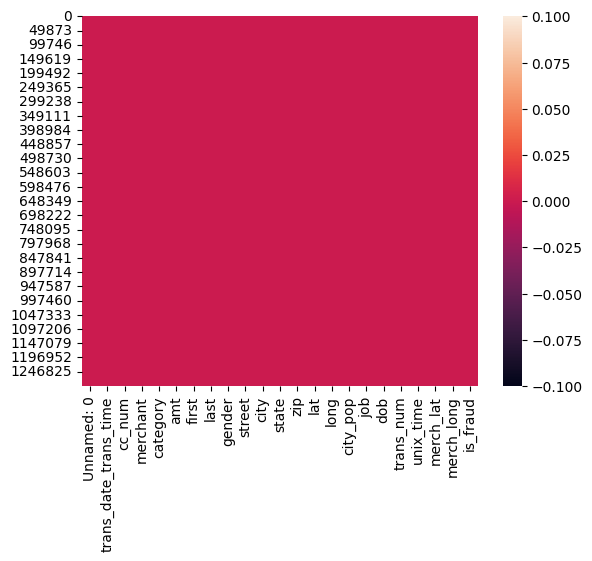

In [13]:
sns.heatmap(train.isnull())

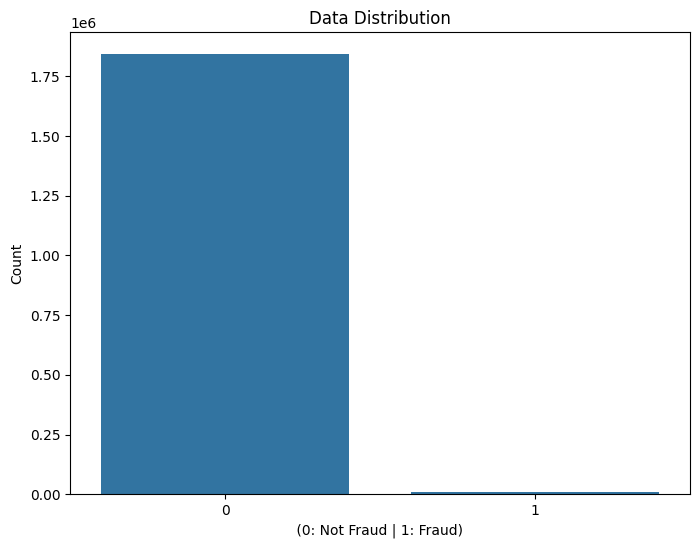

In [14]:
plt.figure(figsize = (8, 6))
sns.countplot(x = 'is_fraud', data = pd.concat([train, test]))
plt.title("Data Distribution")
plt.xlabel(' (0: Not Fraud | 1: Fraud) ')
plt.ylabel('Count')
plt.show()

### Data Cleaning

In [15]:
def clean(data):
    data.drop(["Unnamed: 0",'cc_num','first', 'last', 'street', 'city', 'state', 'zip', 'dob', 'trans_num','trans_date_trans_time'], axis = 1, inplace = True)
    data.dropna()
    return data

In [16]:
clean(train)

,merchant,category,amt,gender,lat,long,city_pop,job,unix_time,merch_lat,merch_long,is_fraud
0,"fraud_Rippin, Kub and Mann",misc_net,4.97,F,36.08,-81.18,3495,"Psychologist, counselling",1325376018,36.01,-82.05,0
1,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,F,48.89,-118.21,149,Special educational needs teacher,1325376044,49.16,-118.19,0
2,fraud_Lind-Buckridge,entertainment,220.11,M,42.18,-112.26,4154,Nature conservation officer,1325376051,43.15,-112.15,0
3,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,M,46.23,-112.11,1939,Patent attorney,1325376076,47.03,-112.56,0
4,fraud_Keeling-Crist,misc_pos,41.96,M,38.42,-79.46,99,Dance movement psychotherapist,1325376186,38.67,-78.63,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1296670,fraud_Reichel Inc,entertainment,15.56,M,37.72,-112.48,258,Geoscientist,1371816728,36.84,-111.69,0
1296671,fraud_Abernathy and Sons,food_dining,51.70,M,39.27,-77.51,100,"Production assistant, television",1371816739,38.91,-78.25,0
1296672,fraud_Stiedemann Ltd,food_dining,105.93,M,32.94,-105.82,899,Naval architect,1371816752,33.62,-105.13,0
1296673,"fraud_Reinger, Weissnat and Strosin",food_dining,74.90,M,43.35,-102.54,1126,Volunteer coordinator,1371816816,42.79,-103.24,0


In [17]:
clean(test)

,merchant,category,amt,gender,lat,long,city_pop,job,unix_time,merch_lat,merch_long,is_fraud
0,fraud_Kirlin and Sons,personal_care,2.86,M,33.97,-80.94,333497,Mechanical engineer,1371816865,33.99,-81.20,0
1,fraud_Sporer-Keebler,personal_care,29.84,F,40.32,-110.44,302,"Sales professional, IT",1371816873,39.45,-109.96,0
2,"fraud_Swaniawski, Nitzsche and Welch",health_fitness,41.28,F,40.67,-73.54,34496,"Librarian, public",1371816893,40.50,-74.20,0
3,fraud_Haley Group,misc_pos,60.05,M,28.57,-80.82,54767,Set designer,1371816915,28.81,-80.88,0
4,fraud_Johnston-Casper,travel,3.19,M,44.25,-85.02,1126,Furniture designer,1371816917,44.96,-85.88,0
...,...,...,...,...,...,...,...,...,...,...,...,...
555714,fraud_Reilly and Sons,health_fitness,43.77,M,40.49,-91.89,519,Town planner,1388534347,39.95,-91.33,0
555715,fraud_Hoppe-Parisian,kids_pets,111.84,M,29.04,-95.44,28739,Futures trader,1388534349,29.66,-96.19,0
555716,fraud_Rau-Robel,kids_pets,86.88,F,46.20,-118.90,3684,Musician,1388534355,46.66,-119.72,0
555717,fraud_Breitenberg LLC,travel,7.99,M,44.63,-116.45,129,Cartographer,1388534364,44.47,-117.08,0


In [18]:
train.shape

(1296675, 12)

In [19]:
test.shape

(555719, 12)

In [20]:
train['gender'] = train['gender'].map({'M': 0, 'F': 1})

In [21]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296675 entries, 0 to 1296674
Data columns (total 12 columns):
 #   Column      Non-Null Count    Dtype  
---  ------      --------------    -----  
 0   merchant    1296675 non-null  object 
 1   category    1296675 non-null  object 
 2   amt         1296675 non-null  float64
 3   gender      1296675 non-null  int64  
 4   lat         1296675 non-null  float64
 5   long        1296675 non-null  float64
 6   city_pop    1296675 non-null  int64  
 7   job         1296675 non-null  object 
 8   unix_time   1296675 non-null  int64  
 9   merch_lat   1296675 non-null  float64
 10  merch_long  1296675 non-null  float64
 11  is_fraud    1296675 non-null  int64  
dtypes: float64(5), int64(4), object(3)
memory usage: 118.7+ MB


In [22]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()

In [23]:
def encode_data(data):
    data['merchant'] = encoder.fit_transform(data['merchant'])
    data['category'] = encoder.fit_transform(data['category'])
    data['gender'] = encoder.fit_transform(data['gender'])
    data['job'] = encoder.fit_transform(data['job'])
    return data

In [24]:
encode_data(train)

,merchant,category,amt,gender,lat,long,city_pop,job,unix_time,merch_lat,merch_long,is_fraud
0,514,8,4.97,1,36.08,-81.18,3495,370,1325376018,36.01,-82.05,0
1,241,4,107.23,1,48.89,-118.21,149,428,1325376044,49.16,-118.19,0
2,390,0,220.11,0,42.18,-112.26,4154,307,1325376051,43.15,-112.15,0
3,360,2,45.00,0,46.23,-112.11,1939,328,1325376076,47.03,-112.56,0
4,297,9,41.96,0,38.42,-79.46,99,116,1325376186,38.67,-78.63,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1296670,499,0,15.56,0,37.72,-112.48,258,215,1371816728,36.84,-111.69,0
1296671,2,1,51.70,0,39.27,-77.51,100,360,1371816739,38.91,-78.25,0
1296672,599,1,105.93,0,32.94,-105.82,899,308,1371816752,33.62,-105.13,0
1296673,509,1,74.90,0,43.35,-102.54,1126,485,1371816816,42.79,-103.24,0


In [25]:
encode_data(test)

,merchant,category,amt,gender,lat,long,city_pop,job,unix_time,merch_lat,merch_long,is_fraud
0,319,10,2.86,1,33.97,-80.94,333497,275,1371816865,33.99,-81.20,0
1,591,10,29.84,0,40.32,-110.44,302,392,1371816873,39.45,-109.96,0
2,611,5,41.28,0,40.67,-73.54,34496,259,1371816893,40.50,-74.20,0
3,222,9,60.05,1,28.57,-80.82,54767,407,1371816915,28.81,-80.88,0
4,292,13,3.19,1,44.25,-85.02,1126,196,1371816917,44.96,-85.88,0
...,...,...,...,...,...,...,...,...,...,...,...,...
555714,507,5,43.77,1,40.49,-91.89,519,460,1388534347,39.95,-91.33,0
555715,264,7,111.84,1,29.04,-95.44,28739,198,1388534349,29.66,-96.19,0
555716,496,7,86.88,0,46.20,-118.90,3684,294,1388534355,46.66,-119.72,0
555717,75,13,7.99,1,44.63,-116.45,129,58,1388534364,44.47,-117.08,0


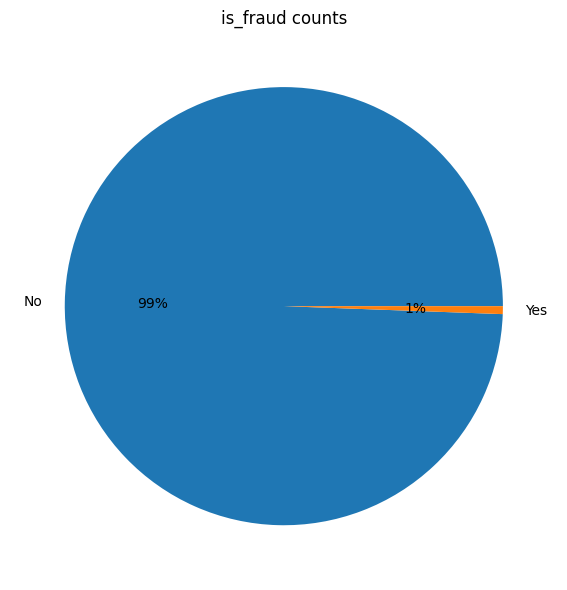

In [26]:
counts = train['is_fraud'].value_counts()
plt.figure(figsize = (12, 6))
plt.pie(counts, labels = ['No', 'Yes'], autopct = '%0.0f%%')
plt.title('is_fraud counts')
plt.tight_layout()
plt.show()

In [27]:
corr = train.corr()

<Axes: >

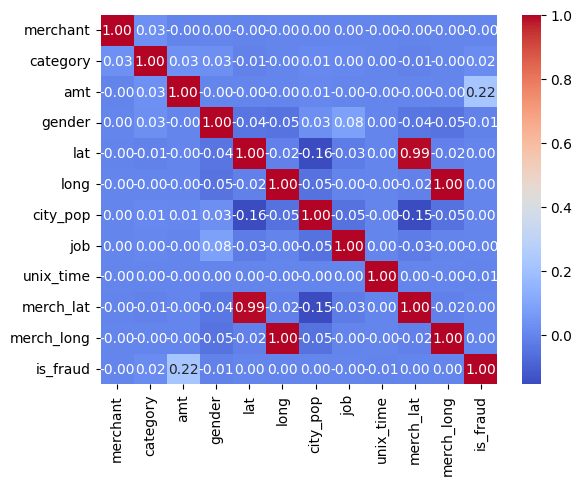

In [28]:
sns.heatmap(corr, annot = True, cmap = 'coolwarm', fmt = '.2f')

### Splitting Data

In [29]:
X_train = train.drop('is_fraud', axis = 1)
X_test = test.drop('is_fraud', axis = 1)
y_train = train['is_fraud']
y_test = test['is_fraud']

In [30]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

### Model Building

In [31]:
col = ['Logistic Regression', 'Decision Tree', 'Random Forest']

In [32]:
accuracy = []

#### 1. Logistic Regression

In [33]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()

In [34]:
lr.fit(X_train, y_train)

LogisticRegression()

In [35]:
y_pred_lr = lr.predict(X_test)

Accuracy (Logistic Regression):  0.9954707325104954


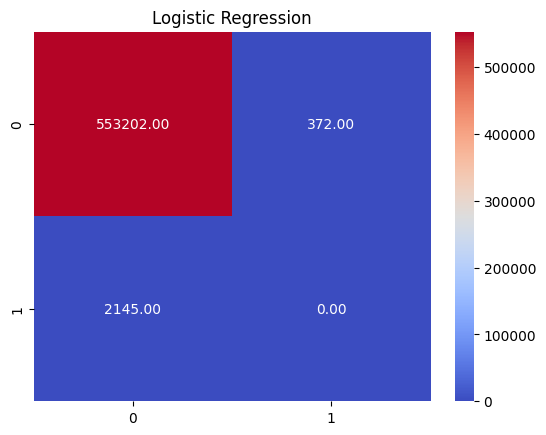

In [36]:
from sklearn.metrics import accuracy_score, confusion_matrix
acc = accuracy_score(y_test, y_pred_lr)
print("Accuracy (Logistic Regression): ", acc)
accuracy.append(acc)

cm = confusion_matrix(y_test, y_pred_lr)
sns.heatmap(cm, annot = True, cmap = 'coolwarm', fmt = '.2f')
plt.title('Logistic Regression')
plt.show()

#### 2. Decision Tree

In [37]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier()

In [38]:
dtc.fit(X_train, y_train)

DecisionTreeClassifier()

In [39]:
y_pred_dtc = dtc.predict(X_test)

Accuracy (Decision Tree):  0.9948265220372167


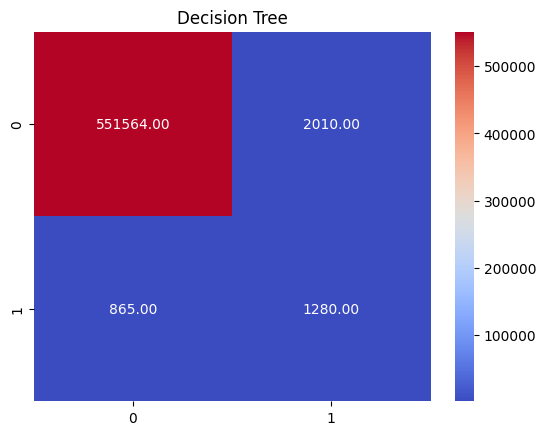

In [40]:
from sklearn.metrics import accuracy_score, confusion_matrix
acc = accuracy_score(y_test, y_pred_dtc)
print("Accuracy (Decision Tree): ", acc)
accuracy.append(acc)

cm = confusion_matrix(y_test, y_pred_dtc)
sns.heatmap(cm, annot = True, cmap = 'coolwarm', fmt = '.2f')
plt.title('Decision Tree')
plt.show()

#### 3. Random Forest 

In [41]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()

In [42]:
rfc.fit(X_train, y_train)

RandomForestClassifier()

In [43]:
y_pred_rfc = rfc.predict(X_test)

Accuracy (Random Forest):  0.9973457808712677


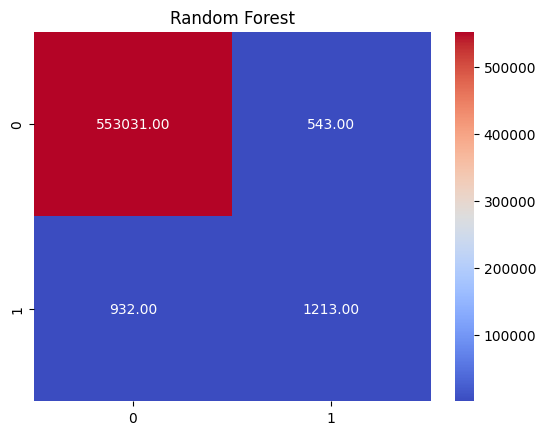

In [44]:
from sklearn.metrics import accuracy_score, confusion_matrix
acc = accuracy_score(y_test, y_pred_rfc)
print("Accuracy (Random Forest): ", acc)
accuracy.append(acc)

cm = confusion_matrix(y_test, y_pred_rfc)
sns.heatmap(cm, annot = True, cmap = 'coolwarm', fmt = '.2f')
plt.title('Random Forest')
plt.show()

### Visualizing results

In [45]:
accuracy

[0.9954707325104954, 0.9948265220372167, 0.9973457808712677]

In [46]:
FinalResult = pd.DataFrame({'Algorithms': col, 'Accuracy': accuracy})

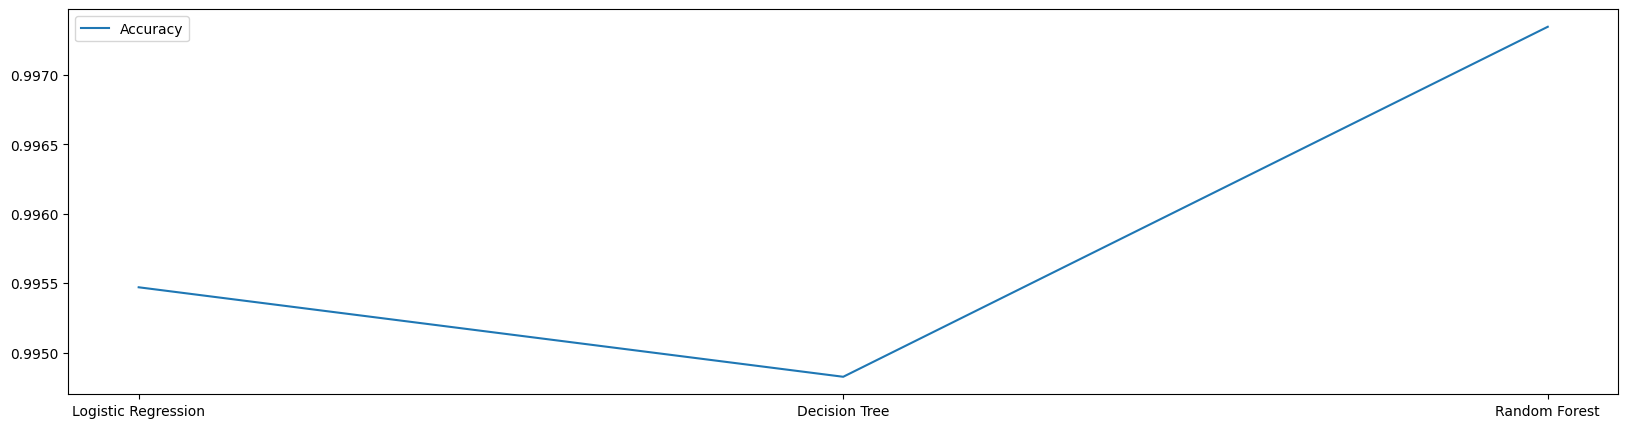

In [47]:
fig, ax = plt.subplots(figsize = (20, 5))
plt.plot(FinalResult.Algorithms, accuracy, label = 'Accuracy')
plt.legend()
plt.show()

## Random Forest has best accuracy of 99.73%